In [63]:
import pandas
import geopandas
from math import log10
import matplotlib.pyplot as plt

In [64]:
SHAPEFILE_PATH = "cb_2021_us_county_500k"
POVERTY_PATH = "ACSST5Y2020.S1701-Data.csv"

In [65]:
POVERTY_COLUMNS = {
    'Estimate!!Below poverty level!!Population for whom poverty status is determined': 'impoverished',
    'Estimate!!Total!!Population for whom poverty status is determined': 'total',
    'Geography': 'geoid'
}
poverty_df: pandas.DataFrame = pandas.read_csv(POVERTY_PATH, header=1)\
    .rename(POVERTY_COLUMNS, axis=1)\
    .loc[:, POVERTY_COLUMNS.values()]
poverty_df


/var/folders/8q/911ddsf164j4ddftj0q7sx_c0000gn/T/ipykernel_4521/93981865.py:6: DtypeWarning: Columns (230,231,232,233,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,562,563,564,565,566,567,568,569,590,591,592,593,610,611,612,613,614,615,616,617,678,679,680,681,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,726,727,728,729) have mixed types. Specify dtype option on import or set low_memory=False.
  poverty_df: pandas.DataFrame = pandas.read_csv(POVERTY_PATH, header=1)\


,impoverished,total,geoid
0,40910326,318564128,0100000US
1,8394,55181,0500000US01001
2,19739,215170,0500000US01003
3,6312,22070,0500000US01005
4,3755,20748,0500000US01007
...,...,...,...
3217,23229,50871,0500000US72145
3218,4438,8438,0500000US72147
3219,10100,21757,0500000US72149
3220,16966,32821,0500000US72151


In [66]:
poverty_df['pct_impoverished'] = poverty_df['impoverished'] / poverty_df['total']

In [67]:
gdf = geopandas.read_file('cb_2021_us_county_500k')\
    .loc[:, ['AFFGEOID', 'ALAND']]
gdf

,AFFGEOID,ALAND
0,0500000US20161,1579077672
1,0500000US19159,1386932347
2,0500000US30009,5303728455
3,0500000US16007,2527123155
4,0500000US55011,1750290818
...,...,...
3229,0500000US53003,1647427905
3230,0500000US13043,629520841
3231,0500000US48451,3941965409
3232,0500000US39089,1767478831


In [68]:
merged = poverty_df.merge(gdf, left_on='geoid', right_on='AFFGEOID')
merged

,impoverished,total,geoid,pct_impoverished,AFFGEOID,ALAND
0,8394,55181,0500000US01001,0.152118,0500000US01001,1539634184
1,19739,215170,0500000US01003,0.091737,0500000US01003,4117656514
2,6312,22070,0500000US01005,0.285999,0500000US01005,2292160149
3,3755,20748,0500000US01007,0.180981,0500000US01007,1612188717
4,7847,57127,0500000US01009,0.137361,0500000US01009,1670259090
...,...,...,...,...,...,...
3216,23229,50871,0500000US72145,0.456626,0500000US72145,118746309
3217,4438,8438,0500000US72147,0.525954,0500000US72147,131541389
3218,10100,21757,0500000US72149,0.464218,0500000US72149,92298569
3219,16966,32821,0500000US72151,0.516925,0500000US72151,143005188


In [69]:
SQ_METER_TO_SQ_MILE = 3.86102E-7

In [70]:
merged['pop_density'] = merged['total'] / (merged['ALAND'] * SQ_METER_TO_SQ_MILE)
merged['log_pop_density'] = merged['pop_density'].apply(log10)

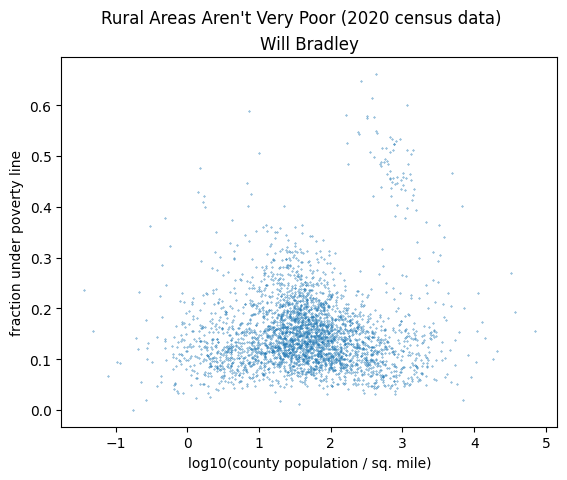

In [77]:

fig, ax = plt.subplots()
fig.suptitle('Rural Areas Aren\'t Very Poor (2020 census data)')
ax.set_title('Will Bradley')
ax.set_xlabel('log10(county population / sq. mile)')
ax.set_ylabel('fraction under poverty line')
ax.scatter(merged['log_pop_density'], merged['pct_impoverished'], s=0.1)


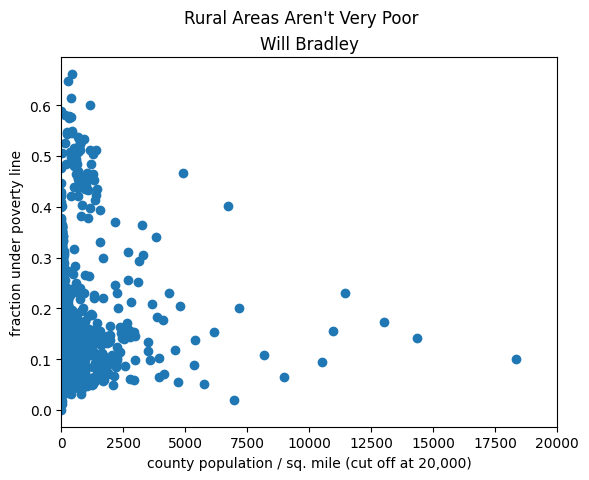

In [72]:
fig, ax = plt.subplots()
fig.suptitle('Rural Areas Aren\'t Very Poor')
ax.set_title('Will Bradley')
ax.set_xlabel('county population / sq. mile (cut off at 20,000)')
ax.set_ylabel('fraction under poverty line')
ax.set_xlim(xmax=20000)
ax.scatter(merged['pop_density'], merged['pct_impoverished'])

In [75]:
merged['pop_density'].describe()

count     3221.000000
mean       284.223923
std       1745.145518
min          0.036064
25%         16.291891
50%         44.593558
75%        130.544268
max      69825.453540
Name: pop_density, dtype: float64